In [1]:
import pandas as pd
import numpy as np
new_df_prep = pd.read_csv("C:\\Users\\phili\\Downloads\\new_df (1).csv")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Exclude 'True_Labels' from features used for clustering
features = new_df_prep.drop(['True_Labels'], axis=1)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features_scaled,
    new_df_prep['True_Labels'],
    test_size=0.2,
    random_state=42
)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=800, max_depth= 16, random_state=42)

# Train the classifier on the training data
random_forest.fit(features_train, labels_train)

# Predict the labels on the test set
rf_predictions = random_forest.predict(features_test)

In [4]:
# Calculate accuracy
accuracies = []
accuracy = accuracy_score(labels_test, rf_predictions)
accuracies.append(accuracy)
print(f"Accuracy: {accuracy:.4f}")

# Detailed performance report
report = classification_report(labels_test, rf_predictions)
print("Classification Report:\n", report)

Accuracy: 0.8676
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.95      0.92      8746
           2       0.87      0.95      0.91      7580
           3       0.88      0.93      0.90      8399
           4       0.88      0.66      0.75      2228
           5       0.89      0.76      0.82      3240
           6       0.81      0.92      0.86      7418
           7       0.91      0.61      0.73      2548
           8       0.94      0.53      0.68      2013

    accuracy                           0.87     42172
   macro avg       0.88      0.79      0.82     42172
weighted avg       0.87      0.87      0.86     42172



In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,), activation='relu', solver='adam', 
                    max_iter=300, random_state=42)

# Train the model
mlp.fit(features_train, labels_train)

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=300, random_state=42)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
mlp_predictions = mlp.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(labels_test, mlp_predictions)
accuracies.append(accuracy)
print("Accuracy:", accuracy_score(labels_test, mlp_predictions))
print("Confusion Matrix:\n", confusion_matrix(labels_test, mlp_predictions))
print("Classification Report:\n", classification_report(labels_test, mlp_predictions))

Accuracy: 0.9236223086408043
Confusion Matrix:
 [[8424   77  100   35   25   53   14   18]
 [ 150 7067  106   70   65   72   28   22]
 [  92  106 8025   34   41   64   25   12]
 [  20   22   25 2014   69   34   14   30]
 [  42   28   44   53 2951   69   27   26]
 [  90   79   91  146  143 6717   72   80]
 [  53   37   52   97   88   64 2107   50]
 [  35   27   33   55   88   82   47 1646]]
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.96      0.95      8746
           2       0.95      0.93      0.94      7580
           3       0.95      0.96      0.95      8399
           4       0.80      0.90      0.85      2228
           5       0.85      0.91      0.88      3240
           6       0.94      0.91      0.92      7418
           7       0.90      0.83      0.86      2548
           8       0.87      0.82      0.84      2013

    accuracy                           0.92     42172
   macro avg       0.90      0.90      0.

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Adjusting labels to start from 0
labels_train_adjusted = labels_train - 1
labels_test_adjusted = labels_test - 1

# Then, use these adjusted labels for training and testing
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(features_train, labels_train_adjusted)
xgb_predictions = xgb_clf.predict(features_test)

# Adjust predictions back to original labeling if necessary
xgb_predictions_adjusted = xgb_predictions + 1

# Recalculate accuracy and classification report using the adjusted predictions
xgb_accuracy = accuracy_score(labels_test, xgb_predictions_adjusted)
accuracies.append(xgb_accuracy)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("XGBoost Classification Report:\n", classification_report(labels_test, xgb_predictions_adjusted))

XGBoost Accuracy: 0.9660
XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.98      0.98      8746
           2       0.97      0.97      0.97      7580
           3       0.97      0.97      0.97      8399
           4       0.96      0.94      0.95      2228
           5       0.96      0.95      0.95      3240
           6       0.96      0.97      0.96      7418
           7       0.96      0.93      0.94      2548
           8       0.96      0.93      0.94      2013

    accuracy                           0.97     42172
   macro avg       0.96      0.96      0.96     42172
weighted avg       0.97      0.97      0.97     42172



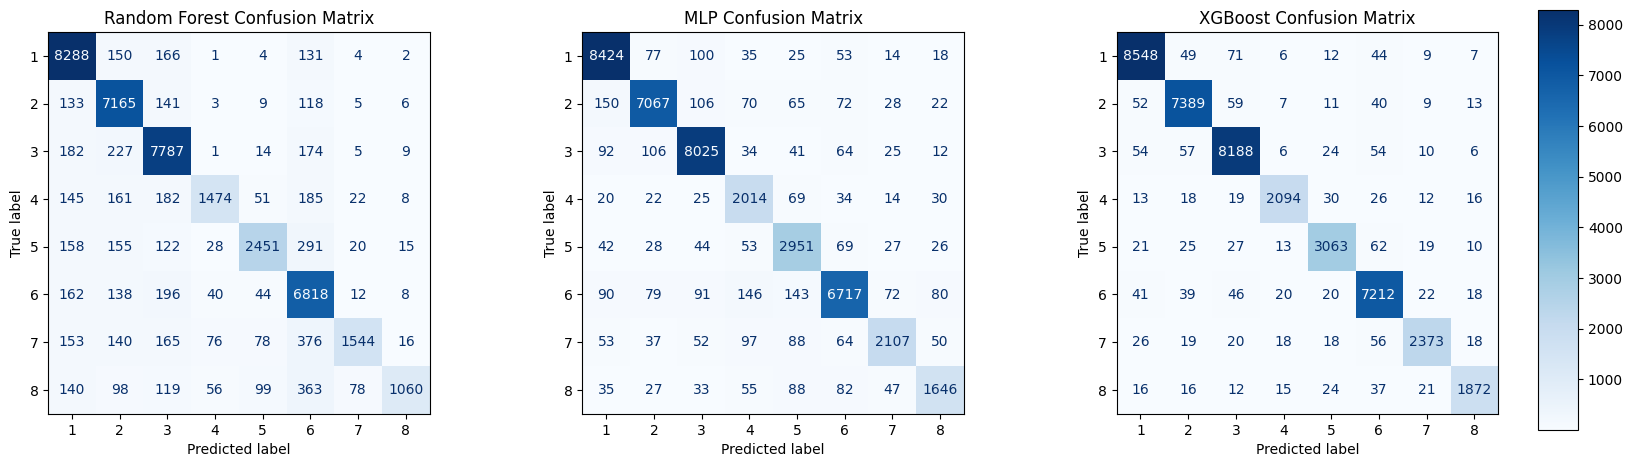

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(labels_test, rf_predictions)
cm_mlp = confusion_matrix(labels_test, mlp_predictions)
cm_xgb = confusion_matrix(labels_test, xgb_predictions_adjusted)

# Create the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Create the ConfusionMatrixDisplay instances
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.arange(1, 9))
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=np.arange(1, 9))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=np.arange(1, 9))

# Plot the confusion matrices
disp_rf.plot(ax=axes[0], cmap='Blues')
disp_mlp.plot(ax=axes[1], cmap='Blues')
disp_xgb.plot(ax=axes[2], cmap='Blues')

# Set titles
axes[0].set_title('Random Forest Confusion Matrix')
axes[1].set_title('MLP Confusion Matrix')
axes[2].set_title('XGBoost Confusion Matrix')

# Remove existing colorbars if any
for ax in axes:
    if ax.images:
        ax.images[-1].colorbar.remove()

# Create a colorbar
fig.subplots_adjust(wspace=0.4, right=0.85)  # Adjust the width between subplots and the right edge of the plots
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # Adjust these values to position your colorbar
fig.colorbar(axes[0].images[0], cax=cbar_ax)

plt.show()

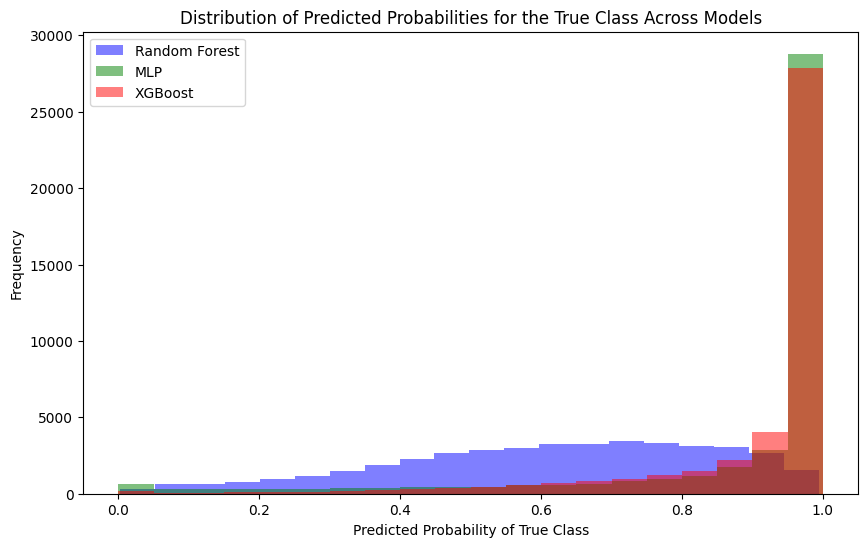

In [9]:
# Predict probabilities
y_prob_rf = random_forest.predict_proba(features_test)
y_prob_mlp = mlp.predict_proba(features_test)
y_prob_xgb = xgb_clf.predict_proba(features_test)
# Extracting the predicted probabilities corresponding to the true class labels
true_class_probs_rf = y_prob_rf[np.arange(len(labels_test_adjusted)), labels_test_adjusted]
true_class_probs_mlp = y_prob_mlp[np.arange(len(labels_test_adjusted)), labels_test_adjusted]
true_class_probs_xgb = y_prob_xgb[np.arange(len(labels_test_adjusted)), labels_test_adjusted]

plt.figure(figsize=(10, 6))
plt.hist(true_class_probs_rf, bins=20, alpha=0.5, label='Random Forest', color='blue')
plt.hist(true_class_probs_mlp, bins=20, alpha=0.5, label='MLP', color='green')
plt.hist(true_class_probs_xgb, bins=20, alpha=0.5, label='XGBoost', color='red')

plt.xlabel('Predicted Probability of True Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for the True Class Across Models')
plt.legend()
plt.show()


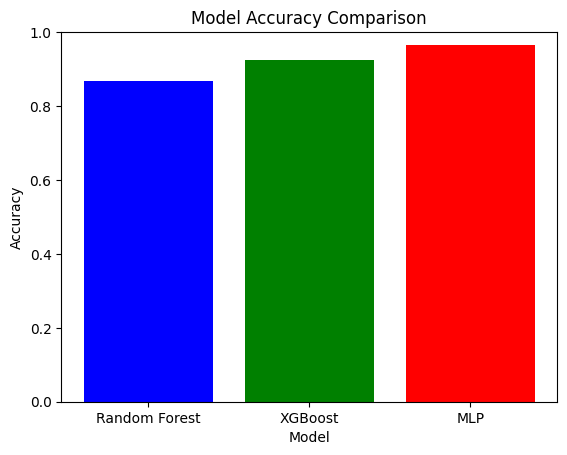

In [10]:
models = ['Random Forest', 'XGBoost', 'MLP']

plt.figure()
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()


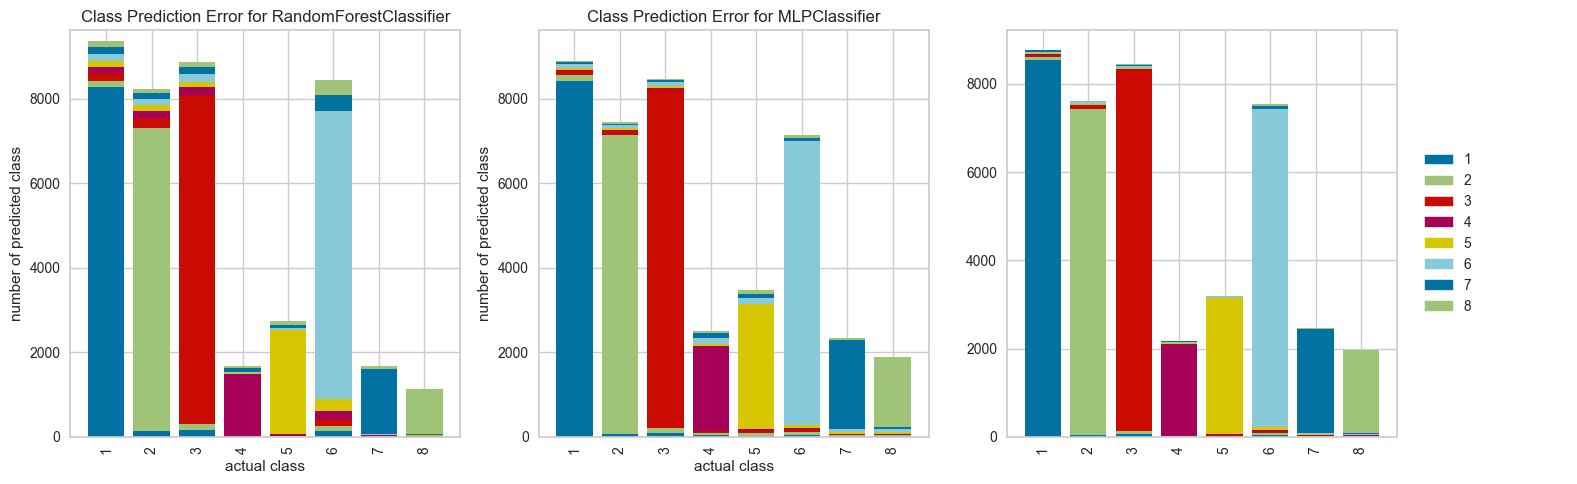

In [11]:
from yellowbrick.classifier import ClassPredictionError

# Set up matplotlib figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize to fit your screen as needed

# Initialize ClassPredictionError for each model and set the axes
visualizer_rf = ClassPredictionError(random_forest, ax=axes[0])
visualizer_mlp = ClassPredictionError(mlp, ax=axes[1])
visualizer_xgb = ClassPredictionError(xgb_clf, ax=axes[2], classes=[str(i) for i in range(1, 9)])

# Fit the training data to each visualizer
visualizer_rf.fit(features_train, labels_train)
visualizer_mlp.fit(features_train, labels_train)
visualizer_xgb.fit(features_train, labels_train_adjusted)

# Set the is_fitted flag to True for the first two visualizers
visualizer_rf.is_fitted = True
visualizer_mlp.is_fitted = True

# Score the models on the test data and draw the visualizations
visualizer_rf.score(features_test, labels_test)
visualizer_rf.finalize()
visualizer_mlp.score(features_test, labels_test)
visualizer_mlp.finalize()
visualizer_xgb.score(features_test, labels_test_adjusted)

for ax in axes[:2]:
    ax.get_legend().remove()

# Manually create and position the legend for the last plot
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

# Use tight_layout to adjust the spacing
plt.tight_layout()

# Show the final plot
plt.show()